In [5]:
import os
import numpy as np
from base import *

In [6]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\test lung'
pthim = os.path.join(pth, '5x')
umpix = 2
pthtest = os.path.join(pth, 'test')
pthtestim = os.path.join(pthtest, '5x')
nm = '10_06_2024_forfun'


WS = [[0, 2, 0, 0, 0, 2, 0], [6, 7], 
      [1, 2, 3, 4, 5, 6, 7], 
      [7, 2, 5, 4, 3, 1, 6], [5]]


numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[170, 170, 255],
                   [  0,  85, 127],
                   [170,   0,   0],
                   [170, 170, 127],
                   [255, 0, 255],
                   [255, 255, 255],
                   [255, 170, 255]])

classNames = ['bronchioles', 'alveoli', 'vasculature', 'mets', 'nonexpanded','whitespace','collagen']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Creating Net metadata file...


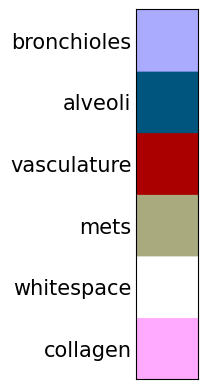

In [7]:
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [8]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
 
 Making downsampled images...
Image 1 of 4: 2024-02-26 10.36.39
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.5935077667236328 seconds
 Creating file...
  Calculating TA image
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding box tiles of all annotations
 Finished image in 13 seconds.
Image 2 of 4: 84 - 2024-02-26 10.33.40
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.6041076183319092 seconds
 Creating file...
  Calculating TA image
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding box tiles of all annotations
 Finished image in 24 seconds.
Image 3 of 4: TVNTC 1-2 2
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.4824798107147217 seconds
 Creating file...
  Calculating TA image
 2. of 4. Interpolating annotated regions and saving mask im

In [9]:

create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 28865500.0 pixels of bronchioles, 8% of the most common class.
 There are 125561600.0 pixels of alveoli, 37% of the most common class.
 There are 20396400.0 pixels of vasculature, 6% of the most common class.
 There are 33140500.0 pixels of mets, 9% of the most common class.
 There are 337923400.0 pixels of whitespace. This is the most common class.
 There are 20018100.0 pixels of collagen, 5% of the most common class.

Building training tiles...
Total time elapsed for the while loop: 445.6570429801941
Saving big tiles
  1 of 15 training images completed in 7 minutes
  Used 1382.8% counts and 100.0% unique annotations of bronchioles
  Used 970.2% counts and 100.0% unique annotations of alveoli
  Used 2143.0% counts and 100.0% unique annotations of vasculature
  Used 1617.9% counts and 100.0% unique annotations of mets
  Used 1377.8% counts and 100.0% unique annotations of whitespace
  Used 2133.8% counts and 100.

TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Starting model training...
Epoch 1/8
500/500 [==============================] - 269s 455ms/step - loss: 0.1402 - accuracy: 0.9482 - val_loss: 0.0912 - val_accuracy: 0.9648
Epoch 2/8
500/500 [==============================] - 220s 437ms/step - loss: 0.0728 - accuracy: 0.9710 - val_loss: 0.0749 - val_accuracy: 0.9705
Epoch 3/8
500/500 [==============================] - 218s 435ms/step - loss: 0.0602 - accuracy: 0.9755 - val_loss: 0.0617 - val_accuracy: 0.9752
Epoch 4/8
500/500 [==============================] - 219s 435ms/step - loss: 0.0541 - accuracy: 0.9777 - val_loss: 0.0585 - val_accuracy: 0.9765
Epoch 5/8
500/500 [==============================] - 219s 435ms/step - loss: 0.0505 - accuracy: 0.9791 - val_loss: 0.0568 - val_accuracy: 0.9772
Epoch 6/8
500/500 [==============================] - 221s 439ms/step - loss: 0.0483 - accuracy: 0.9799 - val_loss: 0.0554 - val_accuracy: 0.9780
Epoch 7/8

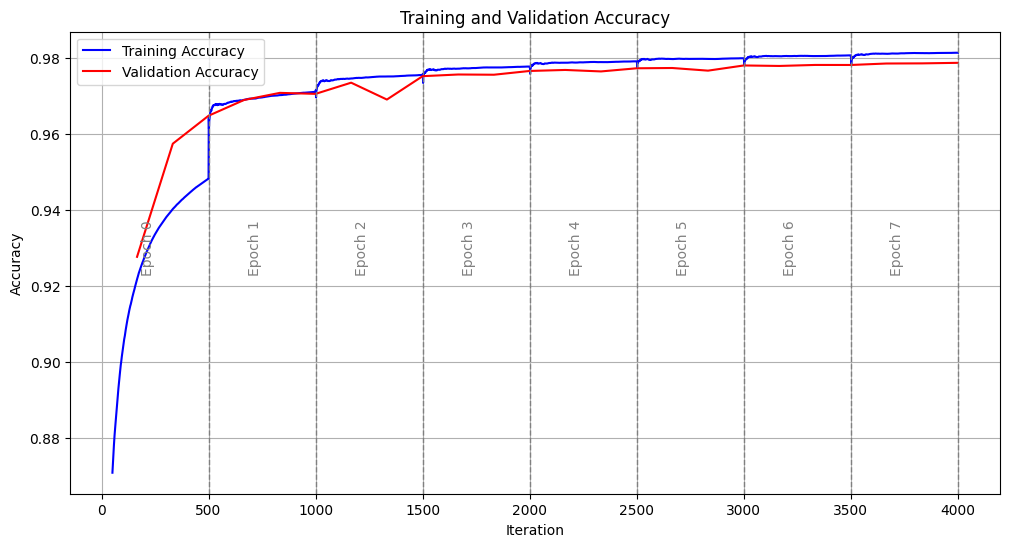

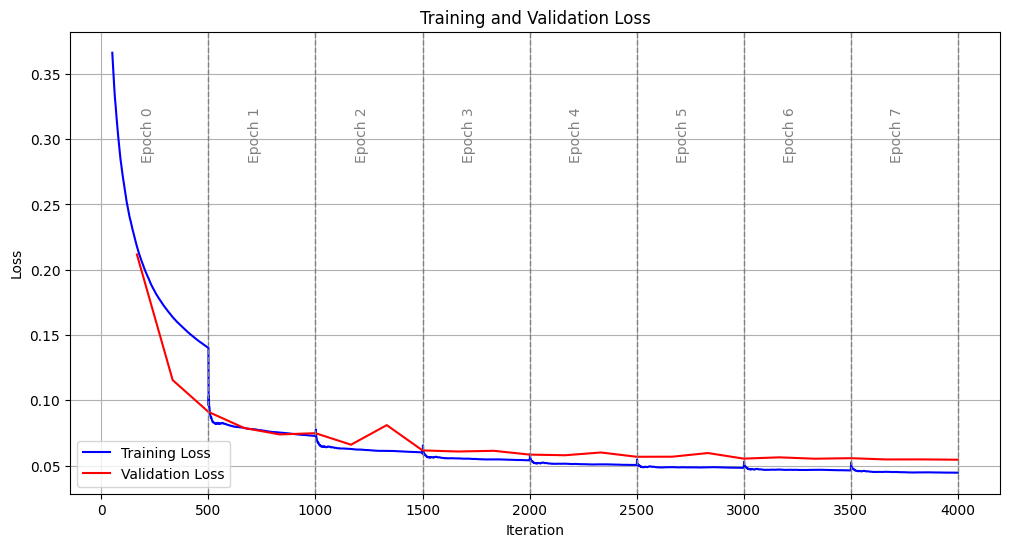

In [10]:
train_segmentation_model(pthDL, fine_tune=False)

Testing segmentation model......
 
Importing annotation data...
 
 Making downsampled images...
Image 1 of 1: TVWT 2-2 2
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.557978630065918 seconds
 Creating file...
  Calculating TA image
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding box tiles of all annotations
 Finished image in 20 seconds.
   
  Starting classification of image 1 of 1: TVWT 2-2 2.tif
Image 1 of 1 took 13 s
  Total time for classification: 0.0h 0.0m 25.540764093399048s


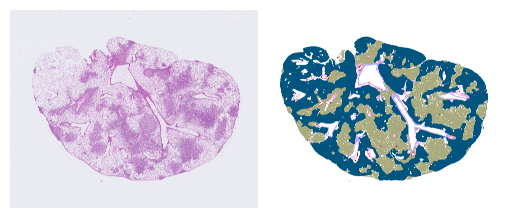


Calculating total number of pixels in the testing dataset...
  There are 45046 pixels of bronchioles, 23% of the most common class.
  There are 115507 pixels of alveoli, 60% of the most common class.
  There are 34798 pixels of vasculature, 18% of the most common class.
  There are 127195 pixels of mets, 66% of the most common class.
  There are 191199 pixels of whitespace. This is the most common class.
  There are 18246 pixels of collagen, 9% of the most common class.


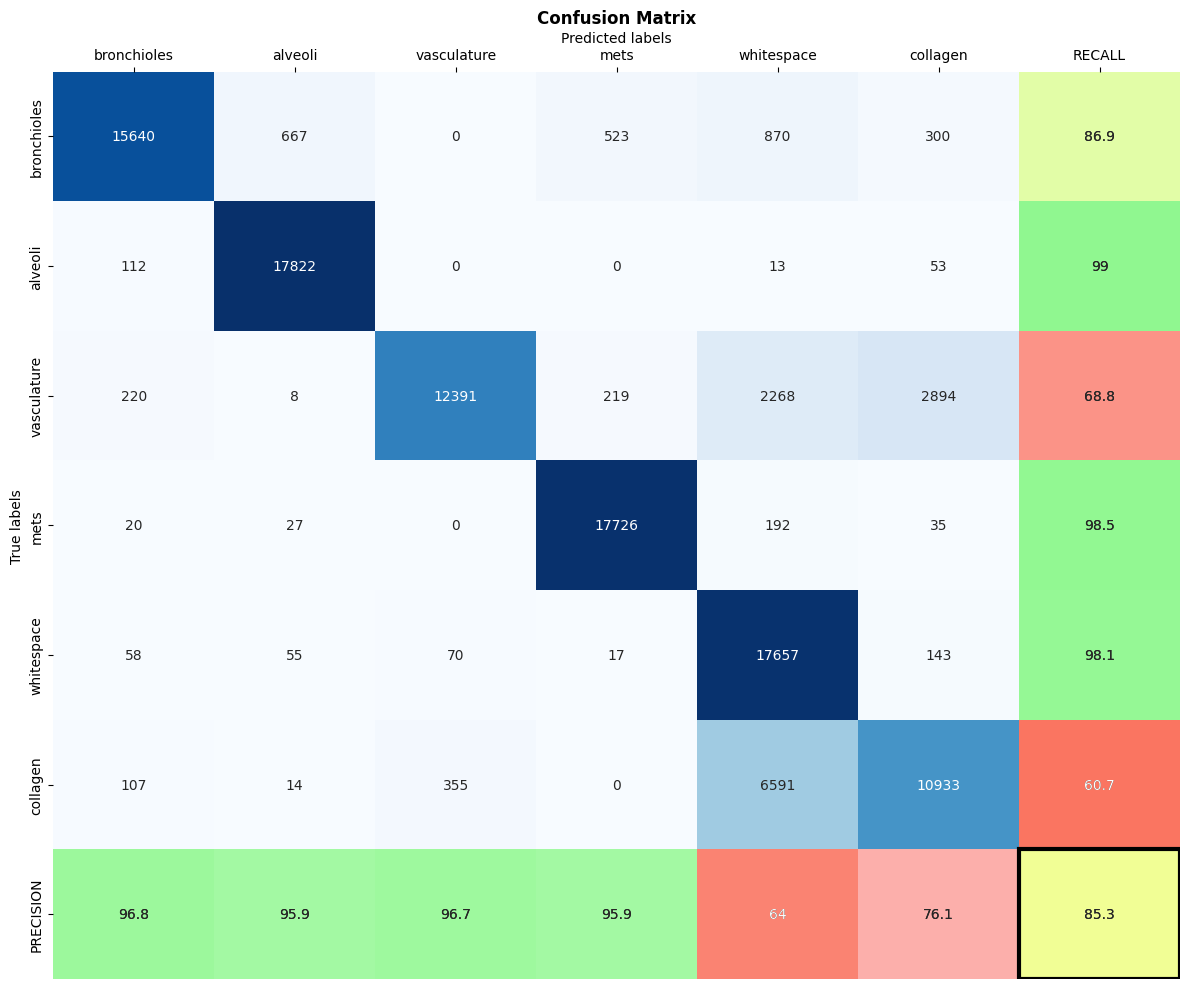


Confusion matrix saved to \\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\test lung\10_06_2024_forfun\confusion_matrix.jpg

Overall Accuracy: 85.3%


In [11]:
test_segmentation_model(pthDL,pthtest, pthtestim)

   
  Starting classification of image 1 of 4: 2024-02-26 10.36.39.tif
Image 1 of 4 took 15 s
  Starting classification of image 2 of 4: 84 - 2024-02-26 10.33.40.tif
Image 2 of 4 took 24 s
  Starting classification of image 3 of 4: TVNTC 1-2 2.tif
Image 3 of 4 took 12 s
  Starting classification of image 4 of 4: TVWT 4-1 1.tif
Image 4 of 4 took 22 s
  Total time for classification: 0.0h 1.0m 52.41509199142456s


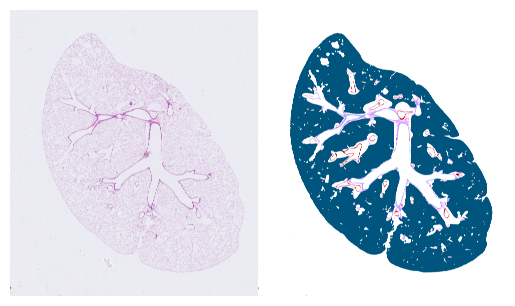

'\\\\10.99.68.52\\Kiemendata\\Valentina Matos\\tissues for methods paper\\test lung\\5x\\classification_10_06_2024_forfun'

In [12]:
classify_images(pthim,pthDL)

In [13]:
quantify_images(pthDL, pthim)

Quantifying images...
Image 1 / 4: 2024-02-26 10.36.39.tif
Image 2 / 4: 84 - 2024-02-26 10.33.40.tif
Image 3 / 4: TVNTC 1-2 2.tif
Image 4 / 4: TVWT 4-1 1.tif


In [1]:
import os
import numpy as np
import cv2

outpth = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\Dashboard project\ECMO image figure'
img_path = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\Dashboard project\ECMO image figure\ECMO_CT_flip_0142.tif'
outpthcolor = os.path.join(outpth, 'color')
os.makedirs(outpthcolor, exist_ok=True)

imclassify = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

imclassify = imclassify - 1

cmap = np.array([[139,149,221],
                   [  222,186,138],
                   [208,139,222],
                   [140,222,138],
                   [222,216,138],
                   [120,30,30],
                   [100,100,100]])

red_channel = cmap[:, 0]
green_channel = cmap[:, 1]
blue_channel = cmap[:, 2]

imcolor = np.dstack((red_channel[imclassify], green_channel[imclassify], blue_channel[imclassify])).astype(
    np.uint8)

save_file_path = os.path.join(outpthcolor, os.path.basename(img_path))
cv2.imwrite(save_file_path, imcolor)

IndexError: index 8 is out of bounds for axis 0 with size 7

In [2]:
#print number of labels
import cv2
import numpy as np
import os
img_path = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\Dashboard project\ECMO image figure\ECMO_CT_flip_0142.tif'
imclassify = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print(np.unique(imclassify))


[1 2 3 4 5 6 7]
